In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
# Import necessary modules
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('dataset.csv', low_memory=False)
# print(df.shape)
# df.describe().transpose()


In [3]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)


Act:  tanh
[0.8620212951649503]
[0.8593062712077416]


ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

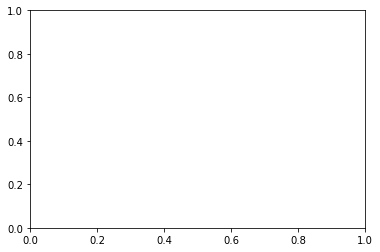

In [4]:
from sklearn.neural_network import MLPClassifier


# C_lst = [0.0001, 0.1, 1, 10, 100, 1000]
# C_lst = [0.0001, 0.1, 1000]
C_lst = [0.0001, 0.001,0.01, 0.1, 1]

act_lst = ['logistic', 'tanh', 'relu']
act = 'tanh'
train_score = []
test_score = []
print("Act: ", act)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
mlp = MLPClassifier(hidden_layer_sizes = (40,20), activation = act, solver = 'adam', max_iter = 10000, alpha = 0.0001)
mlp.fit(X_train, y_train)
# pred_train = mlp.predict(X_train)
# pred_test = mlp.predict(X_test)
test_score.append(mlp.score(X_test, y_test))
train_score.append(mlp.score(X_train, y_train))
print(train_score)
print(test_score)

x_axis = np.log(C_lst)
# x_axis = C_lst
plt.figure()
plt.plot(x_axis, test_score, "-b", label="test")
plt.plot(x_axis,train_score,"-r", label="train")
plt.xlabel("logC")
plt.ylabel("prediction accuracy")
plt.legend(loc="upper right")


Act:  logistic
c:  0.0001
c:  0.001
c:  0.01
c:  0.1
c:  1
[0.8332344213649852, 0.8228242276138942, 0.7447931576191308, 0.5554547041368476, 0.28048874149066155]
[0.8353022495915546, 0.8257299652297767, 0.7451719659838297, 0.5580830296175275, 0.28096853923170373]
Act:  tanh
c:  0.0001
c:  0.001
c:  0.01
c:  0.1
c:  1
[0.8344353290277535, 0.8377517891429569, 0.8197451562227265, 0.6838052016058649, 0.5211450514924071]
[0.8350508985798668, 0.8395123790373257, 0.8205563235725357, 0.6877592057308031, 0.5247161828159692]
Act:  relu
c:  0.0001
c:  0.001
c:  0.01
c:  0.1
c:  1
[0.813377552801536, 0.8178251003665561, 0.7961319602024787, 0.6853552103333915, 0.5296282073660324]
[0.8148799798919191, 0.8198232164551129, 0.7976414896736626, 0.6887646097775544, 0.5328222529429014]


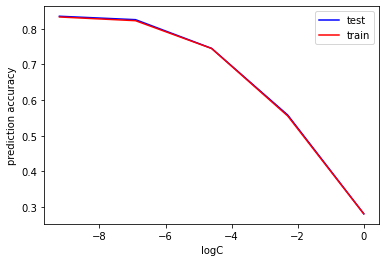

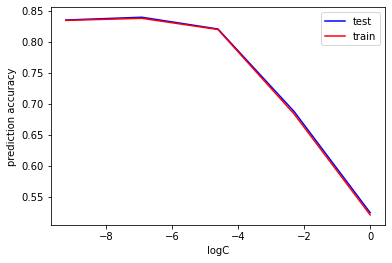

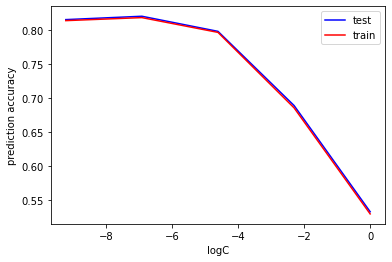

In [38]:
from sklearn.neural_network import MLPClassifier


# C_lst = [0.0001, 0.1, 1, 10, 100, 1000]
# C_lst = [0.0001, 0.1, 1000]
C_lst = [0.0001, 0.001,0.01, 0.1, 1]

act_lst = ['logistic', 'tanh', 'relu']
for act in act_lst:
    train_score = []
    test_score = []
    print("Act: ", act)
    for c in C_lst:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
        print("c: ", c)
        mlp = MLPClassifier(hidden_layer_sizes = (40,), activation = act, solver = 'adam', max_iter = 10000, alpha = c)
        mlp.fit(X_train, y_train)
        # pred_train = mlp.predict(X_train)
        # pred_test = mlp.predict(X_test)
        test_score.append(mlp.score(X_test, y_test))
        train_score.append(mlp.score(X_train, y_train))
    print(train_score)
    print(test_score)

    x_axis = np.log(C_lst)
    # x_axis = C_lst
    plt.figure()
    plt.plot(x_axis, test_score, "-b", label="test")
    plt.plot(x_axis,train_score,"-r", label="train")
    plt.xlabel("logC")
    plt.ylabel("prediction accuracy")

    plt.legend(loc="upper right")


Act:  logistic
c:  0.0001
c:  0.001
c:  0.01
c:  0.1
c:  1
[0.8716634665735731, 0.8664758247512655, 0.8449362890556816, 0.16883225693838366, 0.16883225693838366]
[0.8682082862050187, 0.8649197771354363, 0.8459637216706464, 0.16953625738343597, 0.16953625738343597]
Act:  tanh
c:  0.0001
c:  0.001
c:  0.01
c:  0.1
c:  1
[0.8703787746552627, 0.8674602897538838, 0.8648420317681969, 0.8506755105603072, 0.6312026531680922]
[0.8675589627581585, 0.8653386954882494, 0.8640191026768883, 0.8512420929160907, 0.631875497465544]
Act:  relu
c:  0.0001
c:  0.001
c:  0.01
c:  0.1
c:  1
[0.8775004363763309, 0.8785547215919008, 0.8754826322220283, 0.8507592948158492, 0.7557409670099494]
[0.8756650328850907, 0.8748271961794646, 0.8708684177453814, 0.8513677684219345, 0.7572787063801265]


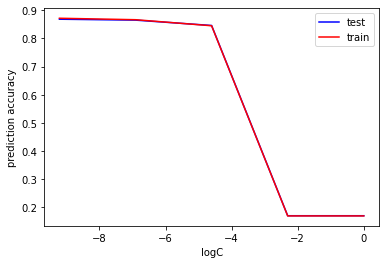

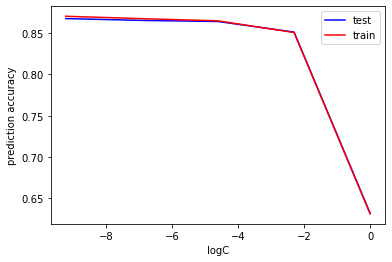

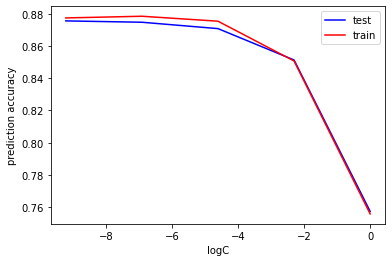

In [39]:
from sklearn.neural_network import MLPClassifier


# C_lst = [0.0001, 0.1, 1, 10, 100, 1000]
# C_lst = [0.0001, 0.1, 1000]
C_lst = [0.0001, 0.001,0.01, 0.1, 1]

act_lst = ['logistic', 'tanh', 'relu']
for act in act_lst:
    train_score = []
    test_score = []
    print("Act: ", act)
    for c in C_lst:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
        print("c: ", c)
        mlp = MLPClassifier(hidden_layer_sizes = (80,40,20), activation = act, solver = 'adam', max_iter = 10000, alpha = c)
        mlp.fit(X_train, y_train)
        # pred_train = mlp.predict(X_train)
        # pred_test = mlp.predict(X_test)
        test_score.append(mlp.score(X_test, y_test))
        train_score.append(mlp.score(X_train, y_train))
    print(train_score)
    print(test_score)

    x_axis = np.log(C_lst)
    # x_axis = C_lst
    plt.figure()
    plt.plot(x_axis, test_score, "-b", label="test")
    plt.plot(x_axis,train_score,"-r", label="train")
    plt.xlabel("logC")
    plt.ylabel("prediction accuracy")

    plt.legend(loc="upper right")




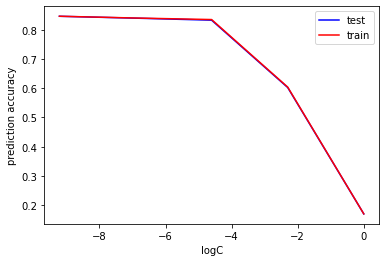

In [6]:
x_axis = np.log(C_lst)
# x_axis = C_lst
train_score=[0.8467806124586318, 0.8406853504252021, 0.8354698169326799, 0.6042059402622428, 0.16989233798332706]
test_score =[0.8466608483155874, 0.8401885145749695, 0.8332972595566417, 0.6027020422412288, 0.1697189736428696]
plt.figure()
plt.plot(x_axis, test_score, "-b", label="test")
plt.plot(x_axis,train_score,"-r", label="train")
plt.xlabel("logC")
plt.ylabel("prediction accuracy")

plt.legend(loc="upper right")

Act:  tanh
c:  10
c:  50
c:  100
c:  1000
c:  10000
[0.16883225693838366, 0.1697189736428696, 0.16883225693838366, 0.1697189736428696, 0.1692860883225694]
[0.16953625738343597, 0.16989233798332706, 0.16953625738343597, 0.16989233798332706, 0.1711281471241255]


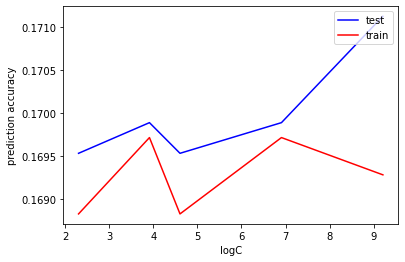

In [7]:
C_lst = [10, 50, 100, 1000, 10000]

act_lst = ['logistic', 'tanh', 'relu']
act = 'tanh'
train_score = []
test_score = []
print("Act: ", act)
for c in C_lst:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
    print("c: ", c)
    mlp = MLPClassifier(hidden_layer_sizes = (40,20), activation = act, solver = 'adam', max_iter = 10000, alpha = c)
    mlp.fit(X_train, y_train)
    # pred_train = mlp.predict(X_train)
    # pred_test = mlp.predict(X_test)
    test_score.append(mlp.score(X_test, y_test))
    train_score.append(mlp.score(X_train, y_train))
print(train_score)
print(test_score)

x_axis = np.log(C_lst)
# x_axis = C_lst
plt.figure()
plt.plot(x_axis, test_score, "-b", label="test")
plt.plot(x_axis,train_score,"-r", label="train")
plt.xlabel("logC")
plt.ylabel("prediction accuracy")
plt.legend(loc="upper right")

In [23]:
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn import svm
new_x = np.sqrt(X)
scaler=preprocessing.StandardScaler()
#Split the data into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size=0.25,random_state=42)
mlp = MLPClassifier(hidden_layer_sizes = (80,40,20), activation = 'relu', solver = 'adam', max_iter = 10000, alpha = 0.0001)
mlp.fit(X_train,y_train)


MLPClassifier(hidden_layer_sizes=(80, 40, 20), max_iter=10000)

C:\Users\Xiong\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


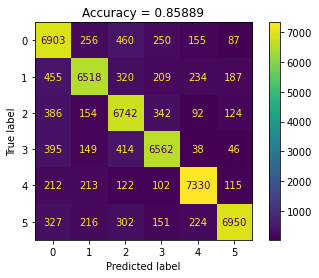

0.8588873528549286


In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp, X_test, y_test)
plt.title("Accuracy = 0.85889")
plt.show()
print(mlp.score(X_test, y_test))

In [ ]:
# train and test in order
# (40,20) logistic
# [0.8467806124586318, 0.8406853504252021, 0.8354698169326799, 0.6042059402622428, 0.16989233798332706]
# [0.8466608483155874, 0.8401885145749695, 0.8332972595566417, 0.6027020422412288, 0.1697189736428696]
#
# （40,20）relu
# [0.839910351472498, 0.8410414310250932, 0.8418164299777974, 0.8222110510661472, 0.6274768547610071]
# [0.8390434630825624, 0.8409355908535521, 0.8428067725606563, 0.8214348053761564, 0.6266015011345785]
# (40,20)  tanh
# [0.8395461686158143, 0.8442241228835748, 0.8477919357654041, 0.8268109617734334, 0.5502740443358353]
# [0.8402873779900297, 0.8441414268359096, 0.8465711532822253, 0.8298563110049851, 0.5525114155251142]
#
# (40) logistic:
# [0.8332344213649852, 0.8228242276138942, 0.7447931576191308, 0.5554547041368476, 0.28048874149066155]
# [0.8353022495915546, 0.8257299652297767, 0.7451719659838297, 0.5580830296175275, 0.28096853923170373]
# (40) tanh:
# [0.8344353290277535, 0.8377517891429569, 0.8197451562227265, 0.6838052016058649, 0.5211450514924071]
# [0.8350508985798668, 0.8395123790373257, 0.8205563235725357, 0.6877592057308031, 0.5247161828159692]
#
# (40) relu:
# [0.813377552801536, 0.8178251003665561, 0.7961319602024787, 0.6853552103333915, 0.5296282073660324]
# [0.8148799798919191, 0.8198232164551129, 0.7976414896736626, 0.6887646097775544, 0.5328222529429014]
#
# (80,40,20) logistic:
# [0.8716634665735731, 0.8664758247512655, 0.8449362890556816, 0.16883225693838366, 0.16883225693838366]
# [0.8682082862050187, 0.8649197771354363, 0.8459637216706464, 0.16953625738343597, 0.16953625738343597]
#
# (80,40,20) tanh:
# [0.8703787746552627, 0.8674602897538838, 0.8648420317681969, 0.8506755105603072, 0.6312026531680922]
# [0.8675589627581585, 0.8653386954882494, 0.8640191026768883, 0.8512420929160907, 0.631875497465544]
#
# (80,40,20) relu:
# [0.8775004363763309, 0.8785547215919008, 0.8754826322220283, 0.8507592948158492, 0.7557409670099494]
# [0.8756650328850907, 0.8748271961794646, 0.8708684177453814, 0.8513677684219345, 0.7572787063801265]
#
